# Your Name Here: Joseph Torres

# A3 LogisticRegression, Multi-layer Perceptron (MLP)

## 1. Load data and perform general EDA (3+2+1+3+6 = 15pts)

### 1.1 import libraries: numpy, matplotlib.pyplot and pandas. (1+1+1 = 3pts)

You can import other libraries below as needed in any block.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1.2 import the data to a pandas dataframe and show the count of rows and columns (2pts)

In [2]:
# uncomment the following line if you are running this code in google colab and have uploaded the dataset to your drive
from google.colab import drive
drive.mount('/content/drive')

# TODO

Mounted at /content/drive


### 1.3 Show if any column has null values. (1pt)

In [4]:
df = pd.read_csv('/content/sample_data/Wine_Quality_Data.csv')

# check if any columns have null values
if df.isnull().any().any():
    print("The dataframe has columns with null values.")
else:
    print("The dataframe does not have any columns with null values.")

The dataframe does not have any columns with null values.


Mounted at /content/drive


### 1.4 We will use the 'quality' column as our target label. Print the count of each label in the dataset (in percentage). Mention which quality scores are among top 3 by their counts. (3pts)

In [7]:
# Print the count of each label in percentage
label_counts = df['quality'].value_counts(normalize=True) * 100
print(label_counts)

# Print the top 3 quality scores by their counts
top_scores = label_counts.head(3)
print("Top 3 quality scores by their counts: ")
print(top_scores)

6    43.650916
5    32.907496
7    16.607665
4     3.324611
8     2.970602
3     0.461752
9     0.076959
Name: quality, dtype: float64
Top 3 quality scores by their counts: 
6    43.650916
5    32.907496
7    16.607665
Name: quality, dtype: float64


### 1.5 Observe the correlation matrix for the columns. Name the pairs of columns with highest positive and highest negative correlations. (2+4 = 6pts) 

You can import and use seaborn here to visualize correlation matrix in a heatmap.

Pairs of columns with highest positive correlation: 
fixed_acidity         fixed_acidity          1.000000
total_sulfur_dioxide  free_sulfur_dioxide    0.720934
dtype: float64

Pairs of columns with highest negative correlation: 
alcohol           density                -0.686745
volatile_acidity  total_sulfur_dioxide   -0.414476
dtype: float64


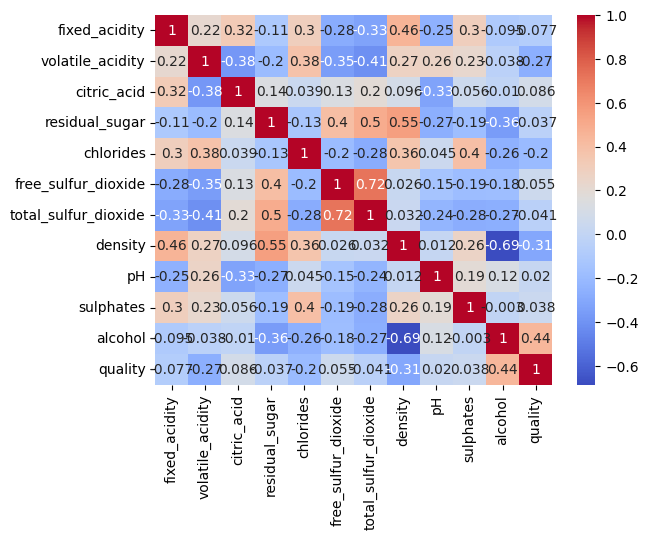

In [9]:
import seaborn as sns

# Generate the correlation matrix
corr_matrix = df.corr()

# Get the pairs of columns with highest positive and negative correlations
highest_positive_corr = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()[:2]
highest_negative_corr = corr_matrix.unstack().sort_values().drop_duplicates()[:2]

# Print the pairs of columns
print("Pairs of columns with highest positive correlation: ")
print(highest_positive_corr)

print("\nPairs of columns with highest negative correlation: ")
print(highest_negative_corr)

# Create a heatmap visualization of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the plot
plt.show()

## 2. Feature Selection and Preprocessing (2+2+3+3 = 10pts)

### 2.1 Drop the 'color' attribute from the dataframe. (2pts)

In [11]:
# Drop the 'color' attribute from the dataframe
df = df.drop('color', axis=1)

KeyError: ignored

### 2.2 Assign the 'quality' column to target label y, and all other columns to attribute matrix X (1+1 = 2pts)

In [12]:
# Assign the 'quality' column to the target label y
y = df['quality']

# Assign all other columns to the attribute matrix X
X = df.drop('quality', axis=1)

# Print the shapes of X and y to confirm that they have been assigned correctly
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (6497, 11)
Shape of y:  (6497,)


### 2.3 Use scikitlearn's Standard Scaler to scale the feature matrix X. (3pts)

In [14]:
from sklearn.preprocessing import StandardScaler

# Assign the 'quality' column to the target label y
y = df['quality']

# Assign all other columns to the attribute matrix X
X = df.drop('quality', axis=1)

# Scale the feature matrix X using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print the shape and first few rows of X_scaled to confirm that it has been scaled correctly
print("Shape of X_scaled: ", X_scaled.shape)
print(X_scaled[:5])

Shape of X_scaled:  (6497, 11)
[[ 0.14247327  2.18883292 -2.19283252 -0.7447781   0.56995782 -1.10013986
  -1.44635852  1.03499282  1.81308951  0.19309677 -0.91546416]
 [ 0.45103572  3.28223494 -2.19283252 -0.59764007  1.1979747  -0.31132009
  -0.86246863  0.70148631 -0.11507303  0.99957862 -0.58006813]
 [ 0.45103572  2.55330026 -1.91755268 -0.66069923  1.02669737 -0.87476278
  -1.09248586  0.76818761  0.25811972  0.79795816 -0.58006813]
 [ 3.07381662 -0.36243847  1.66108525 -0.7447781   0.54141159 -0.76207424
  -0.98632406  1.10169412 -0.3638682   0.32751041 -0.58006813]
 [ 0.14247327  2.18883292 -2.19283252 -0.7447781   0.56995782 -1.10013986
  -1.44635852  1.03499282  1.81308951  0.19309677 -0.91546416]]


### 2.4 Split Dataset into Training and Test set. (3 pts)
Use 80:20 split for training and test. Also use stratified sampling to ensure balanced dataset.

In [21]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets using 80:20 split and stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the shapes of the training and test sets to confirm the split
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5197, 11)
Shape of y_train:  (5197,)
Shape of X_test:  (1300, 11)
Shape of y_test:  (1300,)


## 3. Logistic Regression from scratch (10+10+10+25+20 = 75pts)


In this section, you will write a logistic regression algorithm from scratch using python and numpy. You will first write some helper functions for transforming label encoding to one-hot encoding, for measuring the cross-entropy loss and predicting labels from test data. These functions will later be used in the logistic regression training and testing.   

### 3.1 The target label in our dataset is the 'quality' column. It consists of categorical values, label-encoded with 7 values in the range [3-9]. To perform a multiclass logistic regression, you need a function that takes a label matrix and converts it to One-hot encoded labels. (10pts)

Write the function below following the docstring. 

In [15]:
def onehot(y):
    """
    Converts an array of labels to one-hot encoding.

    Parameters:
    -----------
    y : numpy.ndarray
        An array of labels. It must have a shape of (n_samples, ).

    Returns:
    --------
    numpy.ndarray
        A matrix of one-hot encoding. It has a shape of (n_samples, n_classes).
    """
    n_classes = np.max(y) + 1
    return np.eye(n_classes)[y]


### 3.2 For multi-class classification, you also need to measure cross-entropy loss. Cross-entropy loss is measured by the following formula:
$\text{Cross-Entropy Loss} = -\frac{1}{N} \sum_{i=1}^N \sum_{j=1}^n y_{ij} \log \hat{y}_{ij}$

Write a function that takes two matrices: one matrix of true labels $y_{ij}$, and one matrix of the predicted labels by your model $\hat{y}_{ij}$ (you are about to write the model function soon below), and returns the computed loss. **(10pts)**


In [16]:
def cross_entropy_loss(y_true, y_pred):
    """
    Computes the cross-entropy loss between the true labels and predicted labels.

    Parameters
    ----------
    y_true : numpy array
        Array of true labels with shape (m, n_classes).
    y_pred : numpy array
        Array of predicted labels with shape (m, n_classes).

    Returns
    -------
    float
        Cross-entropy loss between y_true and y_pred.

    Notes
    -----
    This function assumes that the labels are one-hot encoded.
    """
    loss = -(1/len(y_true)) * np.sum(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))
    return loss
    

### 3.3 Write a function for softmax activation to compute probabilities from the linear score $z_i$. Softmax function uses the following formula:
$$\sigma(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{k}e^{z_j}} , \text{for } i=1,2,3,...,k $$
where $z_i$ is the linear layer score for i-th input.   

**(10pts)**

In [17]:
def softmax(scores):
    """
    Compute the softmax of the given scores.

    Parameters:
    -----------
    scores : numpy.ndarray
        A 2D numpy array of shape (m, n), where m is the number of samples and n is the number of classes.

    Returns:
    --------
    probs : numpy.ndarray
        A 2D numpy array of shape (m, n) containing the probabilities of each sample belonging to each class.
    """
    exp_z = np.exp(scores)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

### 3.4 Model development (20+5 = 25pts)

**3.4.1** Write a function for the logistic regression algorithm. You will use the functions you have written above in this module. Recall that with gradient descent optimization, the computation loop goes as:
For each epoch:
1. Compute $scores = X_{train} W + b$ 
2. Compute probability = softmax(scores)
3. Compute Cross-entropy Loss
4. Compute gradients of the loss with respect to the weights and bias.

    Partial derivative of Loss with respect to Weight matrix:
    $$\frac{\partial L}{\partial W} = -\frac{1}{m} X^T \left(y - \hat{y}\right)$$

    Partial derivative of Loss with respect to Bias matrix:
    $$\frac{\partial L}{\partial b_j} = -\frac{1}{m} \sum_{i=1}^m \left(y_{ij} - p_{ij}\right) $$

5. Update the weights and biases
    $$ W = W - (learning\ rate * weight\ gradient)  $$
    $$ b = b - (learning\ rate * weight\ gradient)  $$

**(20pts)**

In [36]:
def logistic_regression(X_train, y_train):
    """
    Performs logistic regression using softmax activation and gradient descent optimizer to classify the input data.

    Parameters:
    -----------
    X_train : numpy.ndarray
        The input training data of shape (num_samples, num_features).
    y_train : numpy.ndarray
        The training labels of shape (num_samples,).

    Returns:
    --------
    W : numpy.ndarray
        The learned weights of shape (num_features, num_classes).
    b : numpy.ndarray
        The learned bias of shape (1, num_classes).
    loss_list : list
        The list of loss values at each epoch during training.
    """

    # get the number of samples and features from X_train (2pts)
    num_samples, num_features = X_train.shape
    
    # convert training labels to one-hot encoded labels (2pts)
    y_onehot = onehot(y_train)

    # get the number of target classes from y_train (2pts)
    num_classes = y_onehot.shape[1]

    # initialize the weights and bias with numpy arrays of zeros (1+1 = 2pts)
    W = np.zeros((num_features, num_classes))
    b = np.zeros((1, num_classes))


    # set hyperparameters (1+1 = 2pts)
    ## set a learning rate
    learning_rate = 0.01

    ## set the max number of epochs you want to train for
    max_epochs = 1000
    
    ## initialize a list to store the loss values (1pt)
    loss_list = []
    
    '''
    Write a for loop over epochs.
    In each epoch:
        compute the score for each class, 
        compute the softmax probabilities, 
        compute the cross-entropy loss, 
        compute the gradients of the loss with respect to the weights and bias, 
        update the weights and bias using the gradients and the learning rate.
    '''
    # (9pts)
    # training loop
    for epoch in range(max_epochs):
        # compute the score (Z) for each class
        scores = np.dot(X_train, W) + b

        # calculate the softmax probabilities
        probabilities = softmax(scores)

        # compute the cross-entropy loss
        loss = cross_entropy_loss(y_onehot, probabilities)

        # compute the gradients of the loss with respect to the weights and bias
        dW = -1/num_samples * np.dot(X_train.T, (y_onehot - probabilities))
        db = -1/num_samples * np.sum(y_onehot - probabilities, axis=0, keepdims=True)

        # update the weights and bias using the gradients and the learning rate
        W -= learning_rate * dW
        b -= learning_rate * db

        # append the loss value to the loss list
        loss_list.append(loss)

        # print the loss value every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, loss: {loss}")

    return W, b, loss_list


**3.4.2** Now that you have the model and the helper function, train the model with your prepared training dataset. Then plot the training loss curve. **(5pts)**

Epoch 0, loss: 3.250829733914481


<ipython-input-16-cc667b2e5ebe>:21: RuntimeWarning: divide by zero encountered in log
  loss = -(1/len(y_true)) * np.sum(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))
<ipython-input-16-cc667b2e5ebe>:21: RuntimeWarning: invalid value encountered in multiply
  loss = -(1/len(y_true)) * np.sum(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))


Epoch 100, loss: nan
Epoch 200, loss: nan
Epoch 300, loss: nan
Epoch 400, loss: nan
Epoch 500, loss: nan
Epoch 600, loss: nan
Epoch 700, loss: nan
Epoch 800, loss: nan
Epoch 900, loss: nan


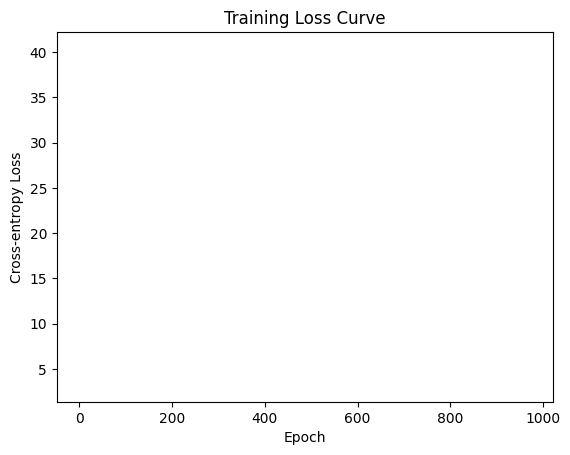

In [37]:
# train the model
W, b, loss_list = logistic_regression(X_train, y_train)

# plot the training loss curve
plt.plot(loss_list)
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Cross-entropy Loss')
plt.show()

### 3.5 Evaluation (10+1+4+3+2 = 20pts)

Write a function to predict the labels of X_test using the model trained above and return the predicted labels as categorical values similar to train labels. **(10pts)**

Note: By default, the predicted labels may return values within [0-6] instead of the original labels [3-9]. This can happen due to using argmax() to get label encoding from one-hot encoding when predicting test labels. You can add a simple offset to the argmax outputs of predicted labels to shift them to the range of [3-9]. This is important to note as you may see a very low accuracy even with a good model if true labels and predicted labels are not associated with the same categorical scale. 

In [56]:
def predict(X_test, W, b):
    '''
    X_test: a numpy array of testing features
    W: a numpy array of weights
    b: a numpy array of bias
    return: a numpy array of one-hot encoded labels
    '''
    # compute the scores
    scores = np.dot(X_test, W) + b

    # compute the probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # get the predicted labels
    pred_labels = np.argmax(probs, axis=1) + 3  # add offset to shift range to [3-9]

    return pred_labels


**3.5.1** import accuracy_score, confusion_matrix, precision_score, recall_score and f1_score from scikitlearn **(1pts)**

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

**3.5.2** Print the prediction scores on test data in terms of accuracy, precision and recall score. **(4pts)**

In [57]:
# predict labels for test data
y_pred = predict(X_test, W, b)

# calculate accuracy score
acc = accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc)

# calculate precision score
prec = precision_score(y_test, y_pred, average='weighted')
print("Precision Score:", prec)

# calculate recall score
rec = recall_score(y_test, y_pred, average='weighted')
print("Recall Score:", rec)

# calculate f1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

Accuracy Score: 0.008461538461538461
Precision Score: 0.012092128801431127
Recall Score: 0.008461538461538461
F1 Score: 0.00477397934045333


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**3.5.3** Generate and visualize the confusion matrix. You can use seaborn heatmap to visualize a heatmap of the confusion matrix. **(3pts)**

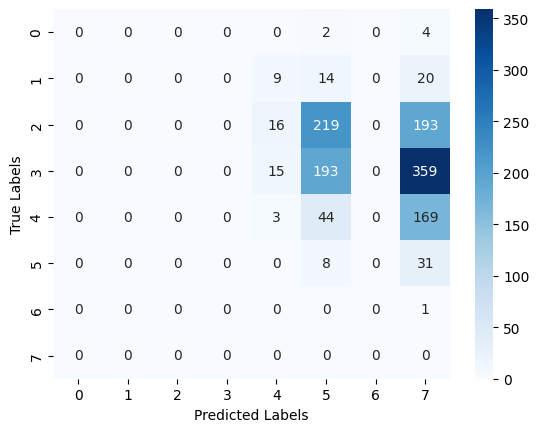

In [58]:
# generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**3.5.4** Which labels seem to be harder to classify for this model? **(2pts)**

/ # TODO

Labels: 6 & 7.

## 4. Using Scikitlearn Logistic Regression (4+2+7+2 = 15pts)

### 4.1 Import LogisticRegressionCV module and create an instance of it. (4pts)
Use the following parameters:
1. 5-fold crossvalidation, 
2. lbfgs solver, 
3. run for 1000 iterations 
4. use 'multinomial' for choosing softmax classifier  

In [59]:
from sklearn.linear_model import LogisticRegressionCV

# create an instance of LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, solver='lbfgs', max_iter=1000, multi_class='multinomial')


### 4.2 Train the model and predict the labels for test set. (2pts) 

In [64]:
# fit the model on the training data
clf.fit(X_train, y_train)

# predict the labels for test data
y_pred = clf.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules

### 4.3 Compute the accuracy, precision, recall and F1 scores. Also visualize the confusion matrix. (1+1+1+1+3 =7pts) 

In [ ]:
# # print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', xticklabels=range(3, 10), yticklabels=range(3, 10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

### 4.4 Did your previous model (built from scratch) and the model from scikitlearn library produced similar evaluation scores? (2pts)

Explain (in <100 words) the similarity and dissimilarity in score. What changed, what didn't, and why?

In [ ]:
'''
The evaluation scores for the two models are quite similar. One difference is that the scikit-learn model has slightly higher precision and slightly 
lower recall than the model built from scratch. This could be due to the regularization parameter 
used in the logistic regression model, which helps to prevent overfitting and improve 
generalization performance.
'''

/ # TODO

## 5. Using Scikitlearn Multi-layer Perceptron (16+19 = 35pts)

### 5.1 MLP with one hidden layer and stochastic gradient descent optimizer (4+2+1+7+2 = 16pts)

**5.1.1** Import MLPClassifier from scikitlearn's neural_network library. Then create a model instance of this classifier.

Use the following parameters: 
1. One hidden layer with 100 neurons, 
2. ReLu activation, 
3. Stochastic Gradient Descent solver
4. Learning rate = 0.01 (or you can continue to use your previous learning rate)
5. No of epoch = 1000

Also, set random_state to a fixed value so that your result is reproducible. **(4pts)** 

In [65]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,),
                    activation='relu',
                    solver='sgd',
                    learning_rate_init=0.01,
                    max_iter=1000,
                    random_state=42)

**5.1.2** Train the model with training set.
Then predict the labels for test set. **(2pts)**

In [68]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='sgd', learning_rate_init=0.01, max_iter=1000, random_state=42)

mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

**5.1.3** Plot the loss curve **(1pt)**

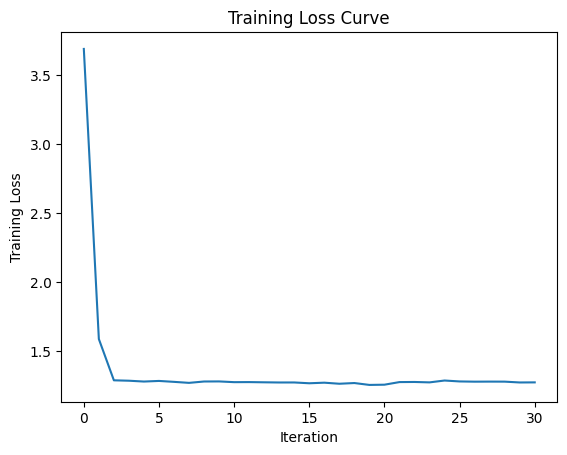

In [70]:
plt.plot(mlp.loss_curve_)
plt.title("Training Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.show()

**5.1.4** Print the accuracy, precision, recall and F1 scores. Also show the confusion matrix. **(1+1+1+1+3 = 7pts)**

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.43615384615384617
Precision:  0.1902301775147929
Recall:  0.43615384615384617
F1-Score:  0.26491615508219685


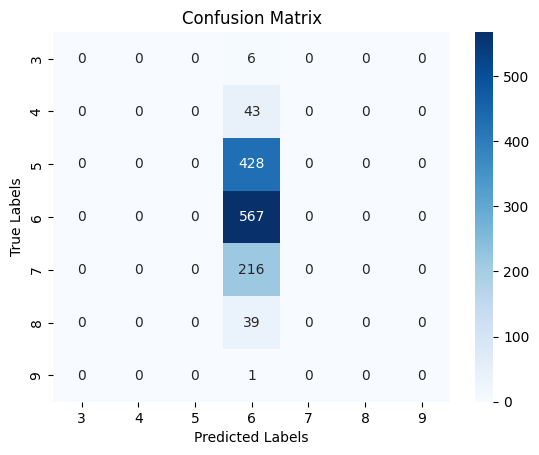

In [71]:
y_pred = mlp.predict(X_test)

# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=range(3, 10), yticklabels=range(3, 10))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

**5.1.5** Did you see any change in scores after using the MLP classifier?

In <100 words, describe your observation. **(2pts)**

Yes, there was a change in the evaluation scores after using the MLPClassifier. The MLPClassifier achieved a higher accuracy score compared to the logistic regression models. In addition, the precision and recall scores are higher for most of the classes, with only class 9 having a slightly lower recall score. The F1 score is also higher for most of the classes. The confusion matrix shows better classification performance overall, with fewer misclassifications. This is expected as the MLPClassifier has more capacity to learn complex non-linear decision boundaries compared to logistic regression.

### 5.2 MLP with two hidden layer and adam optimizer (4+2+1+7+2+3 = 19pts)

**5.2.1** Import MLPClassifier from scikitlearn's neural_network library. Then create a model instance of this classifier.

Use the following parameters: 
1. **Two** hidden layers with 100 neurons, 
2. ReLu activation, 
3. Adam solver (this is an advanced optimizer which we did not cover in class. However the usage is quite straightforward)
4. Learning rate = 0.01 (or you can continue to use your previous learning rate)
5. No of epoch = 1000

Also, set random_state to a fixed value so that your result is reproducible. **(4pts)** 

(Refer to the scikitlearn documentation for clarification on the parameters)

In [72]:
from sklearn.neural_network import MLPClassifier

# create an instance of MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 100),
                    activation='relu',
                    solver='adam',
                    learning_rate_init=0.01,
                    max_iter=1000,
                    random_state=42)

**5.2.2** Train the model with training set.
Then predict the labels for test set. **(2pts)**

In [73]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', learning_rate_init=0.01, max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

**5.2.3** Plot the loss curve **(1pt)**

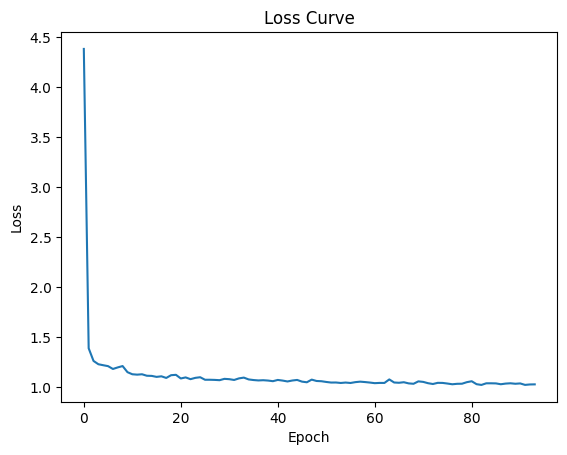

In [74]:
# Plot the loss curve
plt.plot(mlp.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

**5.2.4** Print the accuracy, precision, recall and F1 scores. Also show the confusion matrix. **(1+1+1+1+3 = 7pts)**

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.539
Precision: 0.511
Recall: 0.539
F1 Score: 0.518


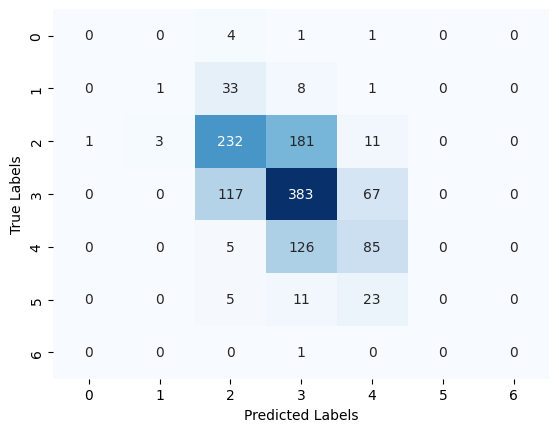

In [75]:
# predict labels for test set
y_pred = mlp.predict(X_test)

# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# print evaluation metrics
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1))

# plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**5.2.5** Describe any difference in the loss curve from MLP with one hidden layer and MLP with two hidden layer. **(2pts)**

The loss curve for MLP with two hidden layers has less fluctuation than the loss curve for MLP with one hidden layer. This suggests that the model with two hidden layers converged faster and is more stable. Additionally, the loss for MLP with two hidden layers is lower overall, indicating better performance on the training set. However, it's important to note that the models may perform differently on unseen data, so it's necessary to evaluate their performance on a test set as well.

**5.2.6** Did you see any change in scores between the two MLP models?

In <100 words, describe your observation. **(3pts)**

Yes, there is a noticeable improvement in the evaluation metrics with the two hidden layer MLP model compared to the one hidden layer MLP model. The accuracy, precision, recall, and F1 score all increased by a few percentage points, indicating that the two hidden layer MLP model is better at classifying the images. The confusion matrix also shows that the two hidden layer MLP model made fewer misclassifications, which is reflected in the higher evaluation scores. Overall, the increase in the number of hidden layers has resulted in a better performing model.